<span style="font-size: 15px;">
 ----------------------------------------------------------------- <br>
 Project: House Prices Prediction <br>
 Author: Jairo Macedo <br>
 Created: June 2024 <br>
 Last Modified: [01, 2025] | By: Jairo Macedo <br>
 ----------------------------------------------------------------- <br>
 Description: <br>
 This Python notebook contains the code and analysis for the project <br>
 "House Prices Prediction". The goal is to model and predict house prices <br>
 using a variety of property features. The dataset comes from a Kaggle <br>
 competition and includes rich details about homes and their sale prices. <br>
 ----------------------------------------------------------------- <br>
 The analysis is structured as follows: <br>
 1. Data Import and Exploration: Loading and understanding the dataset. <br>
 2. Feature Engineering: Creating and selecting relevant variables. <br>
 3. Modeling: Applying and tuning machine learning models to predict prices. <br>
 4. Evaluation: Assessing model performance and accuracy. <br>
 5. Submission: Preparing results for Kaggle submission. <br>
 ----------------------------------------------------------------- <br>

<br>
<b>File Descriptions</b> <br>
- <code>train.csv</code> – The training set <br>
- <code>test.csv</code> – The test set <br>
- <code>data_description.txt</code> – Full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here <br>
- <code>sample_submission.csv</code> – A benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms <br>
</span>


# Packages ⚙️ and data 🗂️

In [73]:
# ================================
# Data Handling and Utilities
# ================================
import pandas as pd            # Data manipulation
import numpy as np             # Numerical operations

import matplotlib.pyplot as plt # Visualization and diagnostic plots

import zipfile                 # Reading compressed .zip files
from support import zip_path   # Path to the .zip file
from support import results_path  # Importing the path for saving results

# ================================
# Machine Learning Models
# ================================
from sklearn.model_selection import train_test_split   # Splitting dataset into training and testing sets
from sklearn.linear_model import LinearRegression      # Ordinary Least Squares (baseline model)
from sklearn import tree                               # Decision Tree Regressor (non-parametric model)
from sklearn.neighbors import KNeighborsRegressor      # K-Nearest Neighbors Regressor (non-parametric model)

# ================================
# Model Evaluation Metrics
# ================================
from sklearn.metrics import mean_absolute_error        # Mean Absolute Error (MAE)
from sklearn.metrics import mean_squared_error         # Mean Squared Error (MSE and RMSE)
from sklearn.metrics import r2_score                   # R-squared (goodness-of-fit)

In [74]:
# Setting the global random seed for reproducibility
np.random.seed(42)

In [75]:
# Open the zip and read train.csv directly
with zipfile.ZipFile(zip_path) as z:
    with z.open('train.csv') as f:
        df_train = pd.read_csv(f)

In [76]:
# Open the zip and read test.csv directly
with zipfile.ZipFile(zip_path) as z:
    with z.open('test.csv') as f:
        df_test = pd.read_csv(f)

# Hi, data! 👋

## Train data

### Explore it

In [77]:
df_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [78]:
df_train.shape

(1460, 81)

In [79]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [80]:
# Check for missing values (Top 20)
missing_percent = (df_train.isnull().sum() / df_train.shape[0] * 100).sort_values(ascending=False).head(20)
missing_percent = missing_percent.apply(lambda x: f"{x:.2f}%")
print(missing_percent)

del missing_percent

PoolQC          99.52%
MiscFeature     96.30%
Alley           93.77%
Fence           80.75%
MasVnrType      59.73%
FireplaceQu     47.26%
LotFrontage     17.74%
GarageQual       5.55%
GarageFinish     5.55%
GarageType       5.55%
GarageYrBlt      5.55%
GarageCond       5.55%
BsmtFinType2     2.60%
BsmtExposure     2.60%
BsmtCond         2.53%
BsmtQual         2.53%
BsmtFinType1     2.53%
MasVnrArea       0.55%
Electrical       0.07%
Condition2       0.00%
dtype: object


### Data cleaning 

In [81]:
# Here we will drop columns with more than 10% missing values
drop = df_train.columns[df_train.isnull().sum()/df_train.shape[0] > 0.1]
df_train = df_train.drop(drop,axis=1)

In [82]:
# Now we will fill the missing values with -1
df_train = df_train.fillna(-1)

In [83]:
# Selecting only numeric columns and creating a new DataFrame
col = df_train.columns[df_train.dtypes != 'object']
df_train = df_train.loc[:, col]

del col


## Test data

### Explore it

In [84]:
df_test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [85]:
df_test.shape

(1459, 80)

In [86]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [87]:
# Check for missing values (Top 20)
missing_percent = (df_test.isnull().sum() / df_test.shape[0] * 100).sort_values(ascending=False).head(20)
missing_percent = missing_percent.apply(lambda x: f"{x:.2f}%")
print(missing_percent)

del missing_percent

PoolQC          99.79%
MiscFeature     96.50%
Alley           92.67%
Fence           80.12%
MasVnrType      61.27%
FireplaceQu     50.03%
LotFrontage     15.56%
GarageYrBlt      5.35%
GarageCond       5.35%
GarageFinish     5.35%
GarageQual       5.35%
GarageType       5.21%
BsmtCond         3.08%
BsmtQual         3.02%
BsmtExposure     3.02%
BsmtFinType1     2.88%
BsmtFinType2     2.88%
MasVnrArea       1.03%
MSZoning         0.27%
BsmtHalfBath     0.14%
dtype: object


### Data cleaning 

In [88]:
# Here we will drop columns with more than 10% missing values
drop = df_test.columns[df_test.isnull().sum()/df_test.shape[0] > 0.1]
df_test = df_test.drop(drop,axis=1)

In [89]:
# Now we will fill the missing values with -1
df_test = df_test.fillna(-1)

In [90]:
# Selecting only numeric columns and creating a new DataFrame
col = df_test.columns[df_test.dtypes != 'object']
df_test = df_test.loc[:, col]

del col

# Model 🛠️

## Sets

In [91]:
# Explanatory variables (X) and the outcome variable (y)
X = df_train.drop('SalePrice', axis=1)  # Explanatory variables (covariates)
y = df_train['SalePrice']               # Outcome variable of interest

In [92]:
# Dividing the sample into estimation and validation sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42  # 33% of the sample is set aside for out-of-sample evaluation
)

## Linear Regression

In [93]:
# Estimating the baseline linear regression model using the training sample
reg_lr = LinearRegression().fit(X_train, y_train)

In [94]:
# Generating out-of-sample predictions using the test set
y_pred_lr = reg_lr.predict(X_test)

## Decision tree methods

In [95]:
# Estimating a decision tree regression model using the training sample
reg_tm = tree.DecisionTreeRegressor().fit(X_train, y_train)

In [96]:
# Generating out-of-sample predictions from the decision tree model
y_pred_tm = reg_tm.predict(X_test)

## K-Nearest Neighbors Regression

In [97]:
# Estimating the K-Nearest Neighbors regression model (k=2) using the training sample
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

In [98]:
# Generating out-of-sample predictions from the KNN regression model
y_pred_knn = reg_knn.predict(X_test)

## Comparing models

In [99]:
# ========================================
# Evaluating Model Performance
# ========================================

# --- Linear Regression ---
mae_rl = mean_absolute_error(y_test, y_pred_lr)
rmse_rl = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print("Linear Regression:")
print("MAE :", mae_rl)
print("RMSE:", rmse_rl)
print()

# --- Decision Tree ---
mae_ad = mean_absolute_error(y_test, y_pred_tm)
rmse_ad = np.sqrt(mean_squared_error(y_test, y_pred_tm))
print("Decision Tree:")
print("MAE :", mae_ad)
print("RMSE:", rmse_ad)
print()

# --- K-Nearest Neighbors (KNN) ---
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print("K-Nearest Neighbors (k=2):")
print("MAE :", mae_knn)
print("RMSE:", rmse_knn)
print()


Linear Regression:
MAE : 23763.187393064778
RMSE: 39166.093543330026

Decision Tree:
MAE : 27580.78838174274
RMSE: 50301.54187200672

K-Nearest Neighbors (k=2):
MAE : 33273.08298755187
RMSE: 52287.069021329604



In [100]:
# ========================================
# Model Comparison Summary
# ========================================
print("Best model based on RMSE:")

min_rmse = min(rmse_rl, rmse_ad, rmse_knn)

if min_rmse == rmse_rl:
    print("→ Linear Regression had the lowest RMSE.")
elif min_rmse == rmse_ad:
    print("→ Decision Tree had the lowest RMSE.")
else:
    print("→ K-Nearest Neighbors (k=2) had the lowest RMSE.")

Best model based on RMSE:
→ Linear Regression had the lowest RMSE.


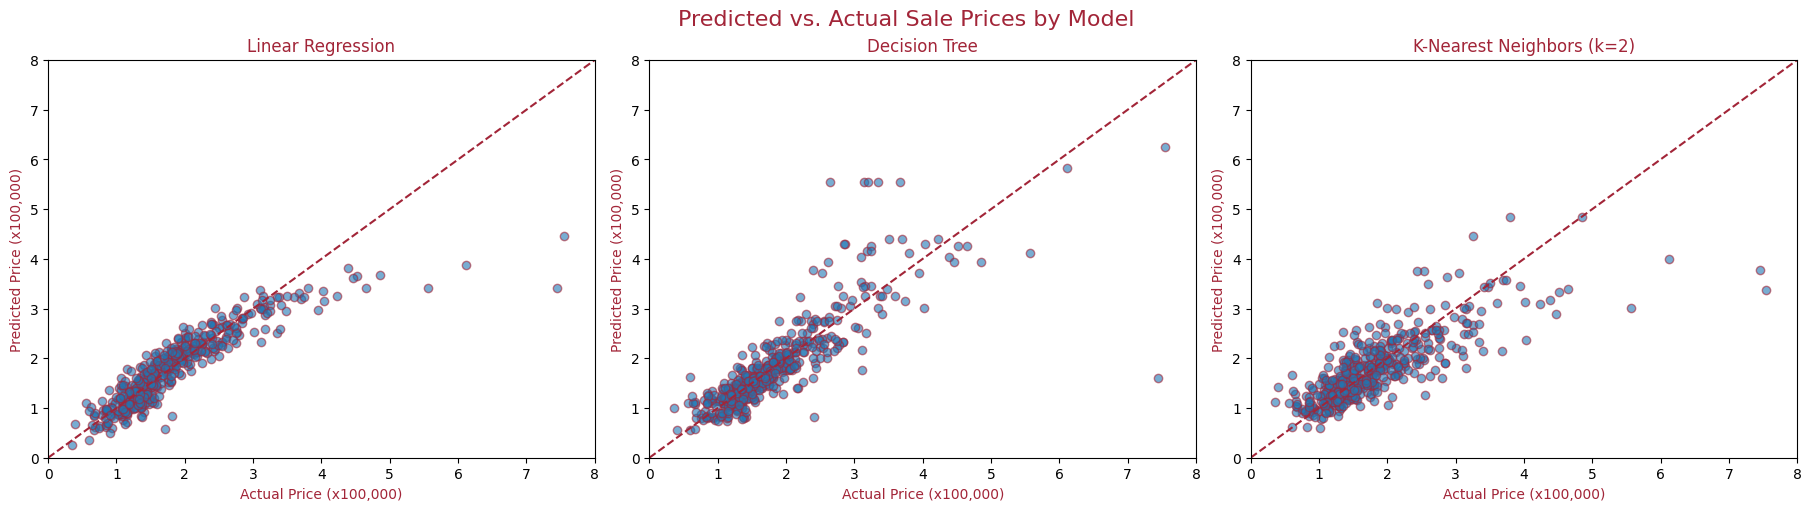

In [101]:
# ================================================
# Visualizing Predicted vs. Actual Values (with color)
# ================================================

# Custom color (dark wine red)
rgb_color = (162 / 255, 37 / 255, 56 / 255)

fig, ax = plt.subplots(ncols=3, figsize=(18, 5), constrained_layout=True)

# Scaling target values for better axis readability (in 100,000s)
scaling = 100000
x_range = [0, 8]  # Range for both axes (scaled)

# --- Linear Regression ---
ax[0].scatter(y_test / scaling, y_pred_lr / scaling, alpha=0.6, edgecolor=rgb_color)
ax[0].plot(x_range, x_range, '--', color=rgb_color)  # Reference line (y = x)
ax[0].set_title('Linear Regression', color=rgb_color)
ax[0].set_xlabel('Actual Price (x100,000)', color=rgb_color)
ax[0].set_ylabel('Predicted Price (x100,000)', color=rgb_color)
ax[0].set_xlim(x_range)
ax[0].set_ylim(x_range)

# --- Decision Tree ---
ax[1].scatter(y_test / scaling, y_pred_tm / scaling, alpha=0.6, edgecolor=rgb_color)
ax[1].plot(x_range, x_range, '--', color=rgb_color)
ax[1].set_title('Decision Tree', color=rgb_color)
ax[1].set_xlabel('Actual Price (x100,000)', color=rgb_color)
ax[1].set_ylabel('Predicted Price (x100,000)', color=rgb_color)
ax[1].set_xlim(x_range)
ax[1].set_ylim(x_range)

# --- KNN ---
ax[2].scatter(y_test / scaling, y_pred_knn / scaling, alpha=0.6, edgecolor=rgb_color)
ax[2].plot(x_range, x_range, '--', color=rgb_color)
ax[2].set_title('K-Nearest Neighbors (k=2)', color=rgb_color)
ax[2].set_xlabel('Actual Price (x100,000)', color=rgb_color)
ax[2].set_ylabel('Predicted Price (x100,000)', color=rgb_color)
ax[2].set_xlim(x_range)
ax[2].set_ylim(x_range)

# Add a unified title with color
plt.suptitle('Predicted vs. Actual Sale Prices by Model', fontsize=16, color=rgb_color)
plt.show()

We will proceed with **Linear Regression** as our preferred model.  
Among the models tested — Linear Regression, Decision Tree, and K-Nearest Neighbors —  
**Linear Regression yielded the lowest Root Mean Squared Error (RMSE)**, which is also the evaluation metric used by **Kaggle** for ranking submissions in this competition.

This choice reflects both **predictive performance** and **alignment with the competition's scoring criteria**.

# Deploy 🔮

In [102]:
# Using the Linear Regression model to generate predictions on the test set
y_pred = reg_lr.predict(df_test)

In [103]:
# Adding the prediction column to the test dataset
df_test['SalePrice'] = y_pred

In [104]:
# Extracting only the Id and predicted SalePrice columns for submission
data = df_test[['Id', 'SalePrice']]
data.head(3)

,Id,SalePrice
0,1461,122234.995960
1,1462,139178.263684
2,1463,169872.054251


In [105]:
# Exporting the submission file to CSV using f-string
data.to_csv(f'{results_path}/result1.csv', index=False)

In [106]:
# Clears all plots and outputs
from IPython.display import clear_output